# 뉴스 카테고리 다중분류
- 목차
    1. 모든 단어 사용 및 머신 러닝
    2. 5000개만 사용해보기
    3. 2500개만 사용해보기
        1. 나이브 베이즈 분류기
        2. CNB
        3. 결정트리
        4. 랜덤 포레스트(Random Forest)
        5. 그래디언트 부스팅 트리
        6. XGBoost
        7. 보팅(Voting)
        8. SGD(확률적 경사하강법)
        - 빈도수 제한없을 때, 정확도 리스트


   
- 참고 자료
    - https://piaojian.tistory.com/36
    - https://intrepidgeeks.com/tutorial/news-classification-multi-classification-problem-python-deep-learning-example

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import reuters
import sklearn

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier

/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(


In [3]:
# 텐서플로우 데이터셋에서 로이터 뉴스 데이터를 받아옵니다.
'''
num_words는 '상위 빈도수'를 뜻합니다.none은 전부다 사용한다는 것이고,
5,000은 빈도수 상위 5,000개의 단어만 사용하고,
2,500은 빈도수 상위 2,500개의 단어만 사용한다는 뜻입니다.
만약 num_words가 5000이고'사랑'라는 단어가 상위 빈도 5000에 들어가면 출력이 되고
5000에 속하지 못한다면 <unk>가 됩니다.
'''
(x_train_1, y_train_1), (x_test_1, y_test_1) = reuters.load_data(num_words=None, test_split=0.2)
(x_train_2, y_train_2), (x_test_2, y_test_2) = reuters.load_data(num_words=5000, test_split=0.2)
(x_train_3, y_train_3), (x_test_3, y_test_3) = reuters.load_data(num_words=2500, test_split=0.2)

In [4]:
num_classes_1 = max(y_train_1) + 1
num_classes_2 = max(y_train_2) + 1
num_classes_3 = max(y_train_3) + 1

print('클래스(정답)의 개수 : {} {} {}'.format(num_classes_1, num_classes_2, num_classes_3))

클래스(정답)의 개수 : 46 46 46


In [5]:
# 이렇게 받아온 데이터가 어떤 구성을 가지고 있는지 출력해 볼까요?
print('x_train_1 개수: {}'.format(len(x_train_1)))
print('y_train_1 개수: {}'.format(len(y_train_1)))
print('x_test_1 개수: {}'.format(len(x_test_1)))
print('y_test_1 개수: {}'.format(len(y_test_1)))
print()
print('x_train_2 개수: {}'.format(len(x_train_2)))
print('y_train_2 개수: {}'.format(len(y_train_2)))
print('x_test_2 개수: {}'.format(len(x_test_2)))
print('y_test_2 개수: {}'.format(len(y_test_2)))
print()
print('x_train_3 개수: {}'.format(len(x_train_3)))
print('y_train_3 개수: {}'.format(len(y_train_3)))
print('x_test_3 개수: {}'.format(len(x_test_3)))
print('y_test_3 개수: {}'.format(len(y_test_3)))

x_train_1 개수: 8982
y_train_1 개수: 8982
x_test_1 개수: 2246
y_test_1 개수: 2246

x_train_2 개수: 8982
y_train_2 개수: 8982
x_test_2 개수: 2246
y_test_2 개수: 2246

x_train_3 개수: 8982
y_train_3 개수: 8982
x_test_3 개수: 2246
y_test_3 개수: 2246


In [6]:
print('토큰화된 x_train_1',x_train_1[8981],sep='\n');print()
print('x_train_1의 정답 ',y_train_1[8981],sep='\n');print()
print('토큰화된 x_test_1',x_test_1[2245], sep='\n');print()
print('x_train_1의 정답',y_test_1[2245], sep='\n');print()


print('토큰화된 x_train_2',x_train_2[8981],sep='\n');print()
print('x_train_2의 정답 ',y_train_2[8981],sep='\n');print()
print('토큰화된 x_test_2',x_test_2[2245], sep='\n');print()
print('x_train_2의 정답',y_test_2[2245], sep='\n');print()

print('토큰화된 x_train_3',x_train_3[8981],sep='\n');print()
print('x_train_3의 정답 ',y_train_3[8981],sep='\n');print()
print('토큰화된 x_test_3',x_test_3[2245], sep='\n');print()
print('x_train_3의 정답',y_test_3[2245], sep='\n');print()

토큰화된 x_train_1
[1, 227, 2406, 91, 21969, 125, 2855, 21, 4, 3976, 76, 7, 4, 757, 481, 3976, 790, 5259, 5654, 9, 111, 149, 8, 7, 10, 76, 223, 51, 4, 417, 8, 1047, 91, 6917, 1688, 340, 7, 194, 9411, 6, 1894, 21, 127, 2151, 2394, 1456, 6, 3034, 4, 329, 433, 7, 65, 87, 1127, 10, 8219, 1475, 290, 9, 21, 567, 16, 1926, 24, 4, 76, 209, 30, 4033, 6655, 5654, 8, 4, 60, 8, 4, 966, 308, 40, 2575, 129, 15562, 295, 277, 1071, 9, 24, 286, 2114, 234, 222, 9, 4, 906, 3994, 8519, 114, 5758, 1752, 7, 4, 113, 17, 12]

x_train_1의 정답 
25

토큰화된 x_test_1
[1, 706, 209, 658, 4, 37, 38, 309, 484, 4, 1434, 6, 933, 4, 89, 709, 377, 101, 28, 4, 143, 511, 101, 5, 47, 758, 15, 90, 2388, 7, 809, 6, 444, 2035, 4, 911, 5, 709, 198, 1997, 634, 3644, 3798, 2305, 8, 1486, 6, 674, 480, 10, 990, 309, 4008, 2190, 2305, 1849, 24, 68, 583, 242, 5, 4, 143, 709, 364, 7376, 41, 30, 13, 706, 6, 837, 4, 377, 101, 6, 631, 28, 47, 758, 15, 36, 1413, 107, 4, 377, 101, 62, 47, 758, 15, 634, 114, 713, 888, 1412, 6, 343, 37, 38, 1116, 95,

- 다운로드를 할 때 차이점은 빈도수에 따라서 <unk>를 할 것인지 안할 것인지 정하는 것이었습니다. 사실 <unk>가 되기 때문에 개수가 하나만 해도 똑같습니다. 그러므로 앞으로 모델 훈련 등이 아니라면 하나만 하겠습니다.

훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


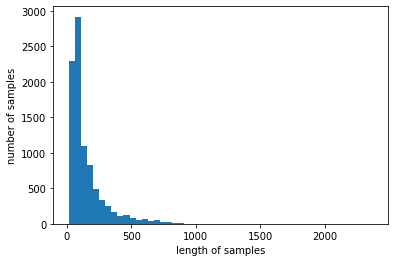

In [7]:
# 뉴스 데이터의 길이 분포 확인하기
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train_1)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train_1))/len(x_train_1)))

plt.hist([len(s) for s in x_train_1], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

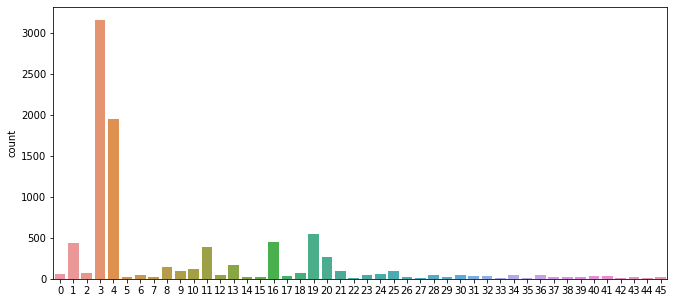

In [8]:
# 클래스(정답) 별로 분포 확인하기
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train_1)
plt.show()

In [9]:
unique_elements, counts_elements = np.unique(y_train_1, return_counts=True)
df = pd.DataFrame(data=counts_elements)
print('클래스 별 빈도수')
display(df)

클래스 별 빈도수


,0
0,55
1,432
2,74
3,3159
4,1949
5,17
6,48
7,16
8,139
9,101


In [10]:
# '단어:인덱스' 변수를 생성
word_index = reuters.get_word_index(path="reuters_word_index.json")

- 이 데이터 사실 0번, 1번, 2번은 사실 각각 , , 라는 자연어 처리를 위한 특별한 토큰들을 위해 맵핑된 번호이다. 그래서 만들어진 index_to_word에 추가적으로 이 작업을 해주어야 진짜 index_to_word가 완성이 된다.

In [11]:
index_to_word = { index+3 : word for word, index in word_index.items() }

# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

In [12]:
print(index_to_word[2], index_to_word[16], index_to_word[0], index_to_word[1])

print()
print('인덱스로 문장 만들기')
print(' '.join([index_to_word[index] for index in [4, 587, 23, 133, 6, 30, 515]]))
print()
print('기사 불러오기')
print(' '.join([index_to_word[index] for index in x_train_1[0]]))

<unk> it <pad> <sos>

인덱스로 문장 만들기
the transaction is expected to be completed

기사 불러오기
<sos> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [13]:
# 숫자에서 문자로 변환하기
def decode(x):
    decoded = []
    for i in range(len(x)):
        t = ' '.join([index_to_word[index] for index in x[i]])
        decoded.append(t)
    return decoded

x_train_1 = decode(x_train_1)
x_test_1 = decode(x_test_1)

x_train_2 = decode(x_train_2)
x_test_2 = decode(x_test_2)

x_train_3 = decode(x_train_3)
x_test_3 = decode(x_test_3)

In [14]:
np.array(x_train_1).shape
np.array(x_test_1).shape

(2246,)

In [15]:
print(len(x_train_1))
print(len(x_test_1))
print()
print(len(x_train_2))
print(len(x_test_2))
print()
print(len(x_train_3))
print(len(x_test_3))

8982
2246

8982
2246

8982
2246


In [16]:
print(len(x_train_1))
print(len(x_test_1))
print()
print(len(x_train_2))
print(len(x_test_2))
print()
print(len(x_train_3))
print(len(x_test_3))


8982
2246

8982
2246

8982
2246


In [17]:
# 숫자에서 문자로 변환된 거 확인하기
x_train_1[549]

"<sos> some producers in the 1987 acreage reduction program may be eligible for deficiency payments on 92 pct of their enrolled acreage even though none of it is planted with wheat or other program crops the u s agriculture department said the department said the provision of the farm disaster assistance act will be available to all eligible winter wheat producers producers of other types of wheat who were prevented from planting their 1987 wheat crop because of a 1986 natural disaster and all producers who operate farms with program crop acreage bases subject to flooding on 50 pct of such crop's permitted acreage a producer who did not enroll in the 1987 acreage reduction program may become eligible by signing up no later than july 15 producers will be informed by the local offices when applications are being accepted it said the department said producers of wheat other than winter wheat may use the 0 92 option if they were preventedf from planting their intended acreage with wheat fo

In [18]:
# 숫자에서 문자로 변환된 거 확인하기
x_test_1[549]

'<sos> florida public utilities co said its board declared a three for two stock split on its common stock it said holders of record april 15 will receive one additional share may one for each two shares held the company also said it raised the dividend on its common stock by two cts to 33 cts a share on a pre split basis the dividend is payable april one to holders of record march 18 reuter 3'

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

def dtmvector_tfidf(x_train, x_test):
    dtmvector = CountVectorizer()
    x_train_dtm = dtmvector.fit_transform(x_train) # train 데이터를 DTM으로 변환
    x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환

    tfidf_transformer = TfidfTransformer()
    tfidfv_train = tfidf_transformer.fit_transform(x_train_dtm)#DTM을 TF-IDF 행렬로 변환
    tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

    return tfidfv_train, tfidfv_test

tfidfv_train_1, tfidfv_test_1 = dtmvector_tfidf(x_train_1, x_test_1)
tfidfv_train_2, tfidfv_test_2 = dtmvector_tfidf(x_train_2, x_test_2)
tfidfv_train_3, tfidfv_test_3 = dtmvector_tfidf(x_train_3, x_test_3)

In [20]:
print(tfidfv_train_1.shape)
print(tfidfv_test_1.shape)
print()
print(tfidfv_train_2.shape)
print(tfidfv_test_2.shape)
print()
print(tfidfv_train_3.shape)
print(tfidfv_test_3.shape)

(8982, 26506)
(2246, 26506)

(8982, 4867)
(2246, 4867)

(8982, 2430)
(2246, 2430)


- 위의 빈도수에 따라 shape의 행렬수가 줄어들었다. 이것과 TF-IDF의 관계를 설명하고 싶었지만 해석을 못했다.

## 모델별 정확도 예측

In [21]:
classifier_list = '나이브 베이즈 분류기,CNB,결정트리,랜덤 포레스트,트리그래디언트 부스팅 트리,XGBoost,보팅,SDG'
classifier_list = classifier_list.split(',')
classifier_answer_list = []

print(classifier_list)

['나이브 베이즈 분류기', 'CNB', '결정트리', '랜덤 포레스트', '트리그래디언트 부스팅 트리', 'XGBoost', '보팅', 'SDG']


## 1. 나이브 베이즈 분류기

In [22]:
def NB(x_train, y_train, x_test, y_test):
    model = MultinomialNB()
    model.fit(x_train, y_train)
    
    predicted = model.predict(x_test) #테스트 데이터에 대한 예측
    
    return print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

In [23]:
# 정확도
NB(tfidfv_train_1, y_train_1, tfidfv_test_1, y_test_1)
NB(tfidfv_train_2, y_train_2, tfidfv_test_2, y_test_2)
NB(tfidfv_train_3, y_train_3, tfidfv_test_3, y_test_3)

정확도: 0.5997328584149599
정확도: 0.6731967943009796
정확도: 0.6905609973285841


## 2. CNB(나이브 베이즈 분류기)

In [24]:
def CNB(x_train, y_train, x_test, y_test):
    cnb = ComplementNB()
    cnb.fit(x_train, y_train)
    predicted = cnb.predict(x_test) #테스트 데이터에 대한 예측
    
    return print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

In [25]:
# 정확도
CNB(tfidfv_train_1, y_train_1, tfidfv_test_1, y_test_1)
CNB(tfidfv_train_2, y_train_2, tfidfv_test_2, y_test_2)
CNB(tfidfv_train_3, y_train_3, tfidfv_test_3, y_test_3)

정확도: 0.7649154051647373
정확도: 0.7707034728406055
정확도: 0.7609082813891362


## 3. 로직스틱 회귀

In [26]:
def LR(x_train, y_train, x_test, y_test):
    lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
    lr.fit(x_train, y_train)
    predicted = lr.predict(x_test) #테스트 데이터에 대한 예측
    
    return print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

In [27]:
# 정확도
LR(tfidfv_train_1, y_train_1, tfidfv_test_1, y_test_1)
LR(tfidfv_train_2, y_train_2, tfidfv_test_2, y_test_2)
LR(tfidfv_train_3, y_train_3, tfidfv_test_3, y_test_3)

정확도: 0.8165627782724845
정확도: 0.8036509349955476
정확도: 0.7831700801424755


## 4. 결정 트리

In [28]:
def DT(x_train, y_train, x_test, y_test):
    tree = DecisionTreeClassifier(max_depth=10, random_state=0)
    tree.fit(x_train, y_train)
    predicted = tree.predict(x_test) #테스트 데이터에 대한 예측
    
    return print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

In [29]:
# 정확도
DT(tfidfv_train_1, y_train_1, tfidfv_test_1, y_test_1)
DT(tfidfv_train_2, y_train_2, tfidfv_test_2, y_test_2)
DT(tfidfv_train_3, y_train_3, tfidfv_test_3, y_test_3)

정확도: 0.6211041852181657
정확도: 0.6179875333926982
정확도: 0.6260017809439002


## 5. 랜덤 포레스트(Random Forest)

In [30]:
def RF(x_train, y_train, x_test, y_test):
    forest = RandomForestClassifier(n_estimators=5, random_state=0)
    forest.fit(x_train, y_train)
    predicted = forest.predict(x_test) #테스트 데이터에 대한 예측
    
    return print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

In [31]:
# 정확도
RF(tfidfv_train_1, y_train_1, tfidfv_test_1, y_test_1)
RF(tfidfv_train_2, y_train_2, tfidfv_test_2, y_test_2)
RF(tfidfv_train_3, y_train_3, tfidfv_test_3, y_test_3)

정확도: 0.6544968833481746
정확도: 0.701246660730187
정확도: 0.705253784505788


## 6. 그래디언트 부스팅 트리(GradientBoostingClassifier)

In [32]:
def GBC(x_train, y_train, x_test, y_test):
    grbt = GradientBoostingClassifier(random_state=0) # verbose=3
    grbt.fit(x_train, y_train)
    predicted = grbt.predict(x_test) #테스트 데이터에 대한 예측
    
    return print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

In [33]:
# 정확도
GBC(tfidfv_train_1, y_train_1, tfidfv_test_1, y_test_1)
GBC(tfidfv_train_2, y_train_2, tfidfv_test_2, y_test_2)
GBC(tfidfv_train_3, y_train_3, tfidfv_test_3, y_test_3)

정확도: 0.7702582368655387
정확도: 0.767586821015138
정확도: 0.7666963490650045


## 7. XGBoost

In [34]:
def XGB(x_train, y_train, x_test, y_test):
    XGB = XGBClassifier()
    XGB.fit(x_train, y_train)
    predicted = XGB.predict(x_test) #테스트 데이터에 대한 예측
    
    return print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교


In [35]:
# 정확도
XGB(tfidfv_train_1, y_train_1, tfidfv_test_1, y_test_1)
XGB(tfidfv_train_2, y_train_2, tfidfv_test_2, y_test_2)
XGB(tfidfv_train_3, y_train_3, tfidfv_test_3, y_test_3)

/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:06:07] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
정확도: 0.7934105075690115


/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:10:04] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
정확도: 0.7956366874443455


/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:13:34] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
정확도: 0.7956366874443455


## 8. 보팅(Voting)

In [36]:
def Voting(x_train, y_train, x_test, y_test):
    voting_classifier = VotingClassifier(estimators=[
             ('lr', LogisticRegression(C=10000, max_iter=3000, penalty='l2')),
            ('cb', ComplementNB()),
            ('grbt', GradientBoostingClassifier(random_state=0))
    ], voting='soft')
    voting_classifier.fit(x_train, y_train)
    
    predicted = voting_classifier.predict(x_test) #테스트 데이터에 대한 예측
    
    return print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

In [37]:
# 정확도
Voting(tfidfv_train_1, y_train_1, tfidfv_test_1, y_test_1)
Voting(tfidfv_train_2, y_train_2, tfidfv_test_2, y_test_2)
Voting(tfidfv_train_3, y_train_3, tfidfv_test_3, y_test_3)

정확도: 0.8156723063223509
정확도: 0.8103294746215495
정확도: 0.7996438112199465


## 9. SGD(확률적 경사하강법)

In [38]:
from sklearn.linear_model import SGDClassifier

def Voting(x_train, y_train, x_test, y_test):
    SGD = SGDClassifier(alpha=0.001)
    SGD.fit(x_train, y_train)
    predicted = SGD.predict(x_test) #테스트 데이터에 대한 예측
    
    return print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

In [39]:
# 정확도
Voting(tfidfv_train_1, y_train_1, tfidfv_test_1, y_test_1)
Voting(tfidfv_train_2, y_train_2, tfidfv_test_2, y_test_2)
Voting(tfidfv_train_3, y_train_3, tfidfv_test_3, y_test_3)

정확도: 0.7996438112199465
정확도: 0.798753339269813
정확도: 0.796527159394479


## 10. 딥러닝과 비교

In [40]:
import numpy as np
from keras.preprocessing import sequence
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dropout
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K 
from sklearn.model_selection import train_test_split
from tensorflow.keras import callbacks

In [41]:
# 단어 상위 빈도수 5,000개이다.
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=5000)

In [42]:
len(train_data), len(test_data)

(8982, 2246)

In [43]:
# 단어로 디코딩할 수 있습니다
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) 
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [44]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data) #        
x_test = vectorize_sequences(test_data) #        

In [45]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_labels) 
one_hot_test_labels = to_one_hot(test_labels)

In [46]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [47]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [48]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])


In [49]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [50]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))


Epoch 1/20
16/16 [==============================] - 1s 26ms/step - loss: 2.5272 - accuracy: 0.5148 - val_loss: 1.6846 - val_accuracy: 0.6320
Epoch 2/20
16/16 [==============================] - 0s 12ms/step - loss: 1.4130 - accuracy: 0.7048 - val_loss: 1.3118 - val_accuracy: 0.7150
Epoch 3/20
16/16 [==============================] - 0s 12ms/step - loss: 1.1046 - accuracy: 0.7621 - val_loss: 1.1563 - val_accuracy: 0.7410
Epoch 4/20
16/16 [==============================] - 0s 11ms/step - loss: 0.9044 - accuracy: 0.8039 - val_loss: 1.0683 - val_accuracy: 0.7710
Epoch 5/20
16/16 [==============================] - 0s 12ms/step - loss: 0.7465 - accuracy: 0.8369 - val_loss: 0.9901 - val_accuracy: 0.7910
Epoch 6/20
16/16 [==============================] - 0s 12ms/step - loss: 0.6191 - accuracy: 0.8671 - val_loss: 0.9681 - val_accuracy: 0.7860
Epoch 7/20
16/16 [==============================] - 0s 12ms/step - loss: 0.5154 - accuracy: 0.8916 - val_loss: 0.8915 - val_accuracy: 0.8100
Epoch 8/20
16

In [51]:
# 모델 평가
model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 0s 2ms/step - loss: 1.1804 - accuracy: 0.7792


[1.1803505420684814, 0.7791629433631897]

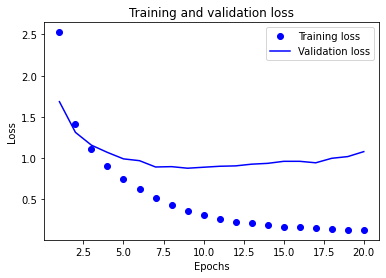

In [52]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 딥러닝, 단어 상위 빈도수 2,500개 학습


In [53]:
# 단어 상위 빈도수 2,500개이다.
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=2500)

In [54]:
from keras.utils.np_utils import to_categorical

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [55]:
# 원핫인코딩을 해줍시다
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [56]:
from keras import models
from keras import layers

# 모델 생성
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax')) # 클래스가 46개

In [57]:
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f777fe7da60>>

In [58]:
# 모델 컴파일 설정
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [59]:
# 데이터 나누기
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [60]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 23ms/step - loss: 3.3139 - accuracy: 0.3346 - val_loss: 2.6176 - val_accuracy: 0.3880
Epoch 2/20
16/16 [==============================] - 0s 11ms/step - loss: 2.0995 - accuracy: 0.5183 - val_loss: 1.6835 - val_accuracy: 0.6360
Epoch 3/20
16/16 [==============================] - 0s 12ms/step - loss: 1.4678 - accuracy: 0.6874 - val_loss: 1.3443 - val_accuracy: 0.6930
Epoch 4/20
16/16 [==============================] - 0s 11ms/step - loss: 1.1821 - accuracy: 0.7449 - val_loss: 1.1813 - val_accuracy: 0.7480
Epoch 5/20
16/16 [==============================] - 0s 12ms/step - loss: 0.9938 - accuracy: 0.7853 - val_loss: 1.0901 - val_accuracy: 0.7640
Epoch 6/20
16/16 [==============================] - 0s 10ms/step - loss: 0.8456 - accuracy: 0.8188 - val_loss: 1.0119 - val_accuracy: 0.7770
Epoch 7/20
16/16 [==============================] - 0s 10ms/step - loss: 0.7166 - accuracy: 0.8458 - val_loss: 0.9514 - val_accuracy: 0.7950
Epoch 8/20
16

In [61]:
# 모델 평가
model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 0s 2ms/step - loss: 1.0633 - accuracy: 0.7903


[1.063262701034546, 0.7902938723564148]

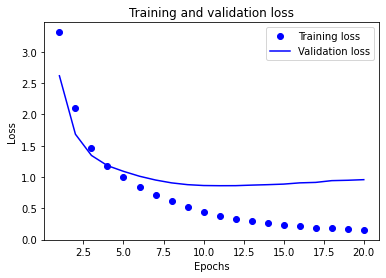

In [62]:
# 시각화
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()